In [1]:
from PlantReactivityAnalysis.data.signal_dataset import SignalDataset
from PlantReactivityAnalysis.config import RAW_DATA_DIR, FIGURES_DIR

In [2]:
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

# Import Data

In [3]:
norm_letters_signal_dataset_path= RAW_DATA_DIR / "raw_signal_dataset.pkl"
signal_dataset= SignalDataset.load(norm_letters_signal_dataset_path)

625 signals have been loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\raw\raw_signal_dataset.pkl


## Data Understanding

In [4]:
num_signals= len(signal_dataset.features)
signal_dataset.features.shape

(625, 6)

In [5]:
signal_dataset.features.head()

,id_measurement,id_performance,datetime,plant,generation,num_eurythmy
0,1,1,2023-04-29,salad,1,1
1,2,1,2023-04-29,salad,1,1
2,3,1,2023-04-29,salad,1,1
3,4,1,2023-04-29,salad,2,0
4,5,1,2023-04-29,salad,2,0


In [6]:
signal_dataset.calculate_average_duration()

238.38458559999984

# Display ID signal

In [7]:
id= 26

In [8]:
features= signal_dataset.features.iloc[id]
print(features)

id_measurement            27
id_performance             5
datetime          2023-05-18
plant                  salad
generation                 1
num_eurythmy               1
Name: 26, dtype: object


In [9]:
signal= signal_dataset.signals[id]

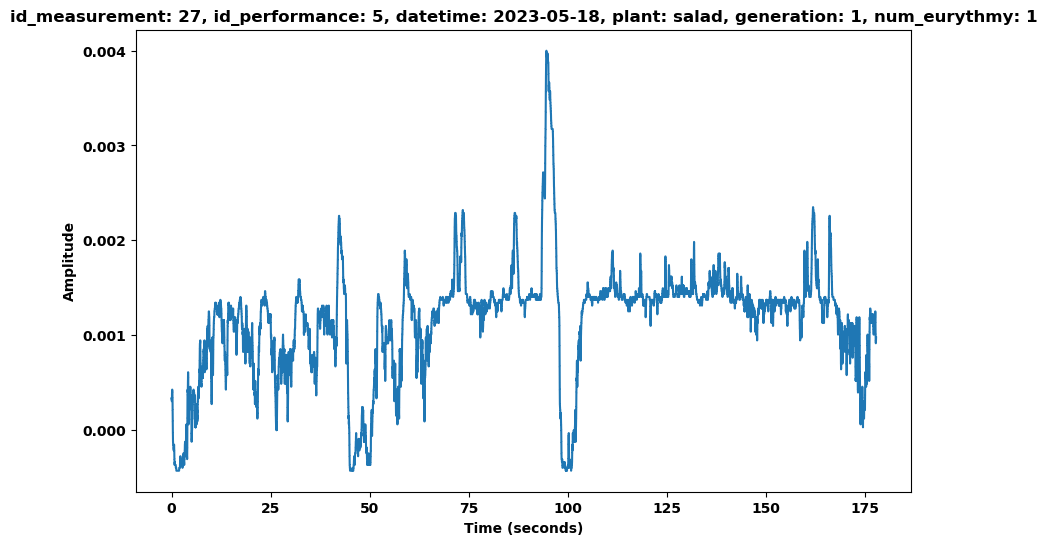

In [10]:
plt.figure(figsize=(10, 6))
time_axis = np.arange(len(signal)) / signal_dataset.sample_rate
plt.plot(time_axis, signal)

feature_info = ", ".join([f"{col}: {val}" for col, val in features.items()])
plt.title(f"{feature_info}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

file_path= os.path.join(FIGURES_DIR, f'signal_{id+1}_display')
plt.savefig(file_path)
plt.show()

In [15]:


            def standardize_wave_zscore(waveform):
                mean = np.mean(waveform)
                std_dev = np.std(waveform)
                return (waveform - mean) / std_dev


